In [1]:
import xarray as xr
import pickle
import pandas as pd
import numpy as np
import os
import datetime as dt
import glob
import netCDF4
import matplotlib.pyplot as plt
import copy
import cfgrib

%matplotlib inline

In [2]:
#combine the mrms machine learning CSV file with the regions pickle to allow for easy editing of the data.
df = pd.read_csv('/gpfs/fs1/home/ac.jcorner/NIU/Masters_Thesis/storm_data/mrms/mrms_preds_v3.csv')
pkl_data = pd.read_pickle('storm_data/mrms/mrms_storm_ids3.pkl')

result = df.merge(pkl_data, left_on='slice_id', right_on='uniq_id')
result

,slice_id,isolated_cell,multiple_isolated_cells,loosely_clustered_cells,tightly_clustered_cells,qlcs,tropical,uniq_id,area,convex_area,...,xmax,ymin,ymax,coords,geometry,start_year,start_month,start_day,start_hour,start_time
0,mrms20200603r0,0.427002,0.217587,0.033217,0.090673,0.025703,0.232784,mrms20200603r0,30.0,33.0,...,5058,247,254,"[[247, 5050], [247, 5051], [248, 5049], [248, ...","POLYGON ((248.000 5049.000, 247.000 5050.000, ...",2020,6,3,0,2020-06-03
1,mrms20200603r1,0.778345,0.210182,0.005533,0.013603,0.002902,0.035242,mrms20200603r1,39.0,45.0,...,5048,249,257,"[[249, 5041], [249, 5042], [250, 5040], [250, ...","POLYGON ((251.000 5039.000, 249.000 5041.000, ...",2020,6,3,0,2020-06-03
2,mrms20200603r10,0.791331,0.215539,0.004697,0.010371,0.001905,0.029570,mrms20200603r10,112.0,209.0,...,3393,352,366,"[[352, 3374], [353, 3375], [353, 3376], [354, ...","POLYGON ((352.000 3374.000, 356.000 3388.000, ...",2020,6,3,0,2020-06-03
3,mrms20200603r100,0.791236,0.217458,0.008212,0.015978,0.002893,0.042150,mrms20200603r100,122.0,265.0,...,4253,808,817,"[[808, 4241], [808, 4242], [808, 4244], [809, ...","POLYGON ((816.000 4216.000, 811.000 4217.000, ...",2020,6,3,0,2020-06-03
4,mrms20200603r101,0.765991,0.212101,0.007112,0.016615,0.003823,0.044629,mrms20200603r101,30.0,36.0,...,4102,811,816,"[[811, 4094], [811, 4095], [811, 4096], [812, ...","POLYGON ((811.000 4094.000, 811.000 4096.000, ...",2020,6,3,0,2020-06-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16068,mrms20200811r16068,0.849544,0.202475,0.002427,0.004547,0.000554,0.014093,mrms20200811r16068,175.0,218.0,...,4933,2801,2807,"[[2801, 4911], [2801, 4912], [2801, 4913], [28...","POLYGON ((2805.000 4898.000, 2803.000 4899.000...",2020,8,11,0,2020-08-11
16069,mrms20200811r16069,0.545816,0.216236,0.028914,0.081948,0.023223,0.202473,mrms20200811r16069,28.0,31.0,...,858,3146,3150,"[[3146, 855], [3146, 856], [3147, 853], [3147,...","POLYGON ((3149.000 850.000, 3148.000 851.000, ...",2020,8,11,0,2020-08-11
16070,mrms20200811r16070,0.753583,0.215446,0.009397,0.022313,0.005252,0.054422,mrms20200811r16070,53.0,89.0,...,797,3432,3436,"[[3432, 780], [3432, 781], [3432, 782], [3432,...","POLYGON ((3434.000 775.000, 3432.000 780.000, ...",2020,8,11,0,2020-08-11
16071,mrms20200811r16071,0.619396,0.216041,0.023294,0.064364,0.018034,0.147588,mrms20200811r16071,54.0,88.0,...,810,3491,3496,"[[3491, 800], [3492, 796], [3492, 797], [3492,...","POLYGON ((3494.000 789.000, 3493.000 792.000, ...",2020,8,11,0,2020-08-11


In [3]:
storm_dates = glob.glob('/lcrc/project/rainfall/jcorner/MODE_data/*')
storm_dates.sort()
storm_dates

['/lcrc/project/rainfall/jcorner/MODE_data/202006030000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006040000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006050000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006080000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006100000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006190000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006200000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006210000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006220000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006230000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006270000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006290000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006300000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202007010000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202007030000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202007100000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202007120000',
 '/lcrc/projec

In [4]:
ds = xr.open_dataset(f'/lcrc/project/rainfall/jcorner/MODE_data/202006030000/mrms_lcref202006030000.nc4')

In [2]:
working_df = result[(result['start_time']==f'2020-06-03')]
working_df = working_df[(working_df['multiple_isolated_cells'] > 0.5)]

blanks = np.zeros((ds.mrms_lcref.shape))

ds = ds.where(ds['mrms_lcref'] >= 20, 0)
#cur_rad = cur_rad.mrms_lcref.values


for rid, row in working_df.iterrows():
    blanks[row['ymin']:row['ymax']+1, row['xmin']:row['xmax']+1] = 1
    
cpy = copy.deepcopy(ds)

#new = cpy.assign(mrms_lcref=(('lat', 'lon'), ds['mrms_lcref'].values * blanks), attributes = {'units': {'dBZ'}, 'long_name': {'reflectivity'}})
new = cpy.assign(mrms_lcref=(('lat', 'lon'), ds['mrms_lcref'].values * blanks), attributes = list(ds.mrms_lcref.attrs))
ds.mrms_lcref.attrs
#new2 = new['mrms_lcref'].assign_attrs({'units': 'dBZ', 'long_name': 'reflectivity'})

new
#new.to_netcdf(f'test_copy.nc4')



NameError: name 'result' is not defined

In [12]:
ds.mrms_lcref.attrs

{'units': 'dBZ', 'long_name': 'reflectivity'}

In [45]:
lat = new.lat.values
lon = new.lon.values
rad = new.mrms_lcref.values

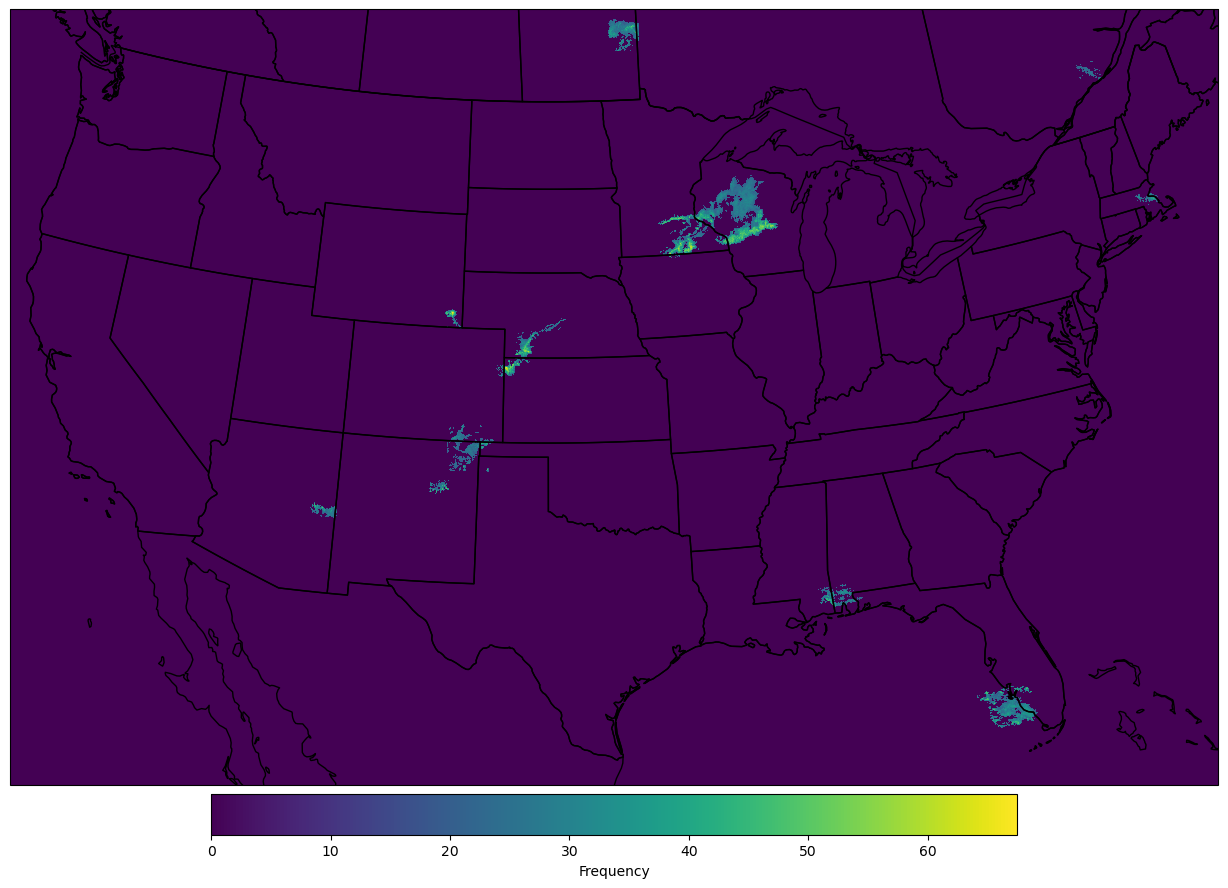

In [46]:
import matplotlib.pyplot as plt
import cartopy


fig = plt.figure()
fig.set_size_inches(16,12)
ax1 = fig.add_subplot(111, projection = cartopy.crs.LambertConformal(central_latitude = 40., central_longitude = -100.))


ax1.add_feature(cartopy.feature.STATES.with_scale('50m'), facecolor='none', zorder = 9)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.COASTLINE)
ax1.add_feature(cartopy.feature.BORDERS)

ax1.set_extent([-120,-75,23,50])

cfset = plt.pcolormesh(lon, lat, rad, transform=cartopy.crs.PlateCarree(), shading='auto')

#plt.title('Frequency of QLCS Storm Mode', fontsize = 'xx-large')
plt.colorbar(cfset, shrink=0.65, label='Frequency', location = 'bottom', pad= 0.01)

In [25]:
np.max(cur_rad)

67.5

In [ ]:
ds.where(ds['mrms_lcref'] >= 100, 0)

In [37]:
ds = ds.where(ds['mrms_lcref'] >= 20, 0)

In [24]:
cur_rad = cur_rad.mrms_lcref.values

<xarray.Dataset>
Dimensions:     (lon: 7000, lat: 3500)
Coordinates:
  * lon         (lon) float32 -130.0 -130.0 -130.0 ... -60.03 -60.02 -60.01
  * lat         (lat) float32 20.0 20.01 20.02 20.03 ... 54.96 54.97 54.98 54.99
Data variables:
    mrms_lcref  (lat, lon) float64 -32.0 -32.0 -32.0 -32.0 ... -32.0 -32.0 -32.0
Attributes:
    Conventions:  CF-1.6

In [4]:
storm_modes = ['multiple_isolated_cells', 'loosely_clustered_cells', 'tightly_clustered_cells', 'qlcs', 'isolated_cell']


for date in storm_dates:
    ds = xr.open_dataset(f'{date}/mrms_lcref{date[-12::]}.nc4')
    ds = ds.where(ds['mrms_lcref'] >= 20, 0)
    working_df = result[(result['start_time']==f'2020-{date[-8:-6]}-{date[-6:-4]}')]
    print(date)
    
    
    #cpy = copy.deepcopy(ds)
    
    for modes in storm_modes:
        new_df = working_df[(working_df[modes] > 0.5)]
        blanks = np.zeros((ds.mrms_lcref.shape))
        #cpy = copy.deepcopy(ds)
        
        print(modes)
        
        for rid, row in new_df.iterrows():
            blanks[row['ymin']:row['ymax']+1, row['xmin']:row['xmax']+1] = 1
            
        cpy = ds.copy(deep=True, data={'mrms_lcref': ds['mrms_lcref'].values * blanks})
        
        #array = cur_rad * blanks
        #new = cpy.assign(mrms_lcref=(('lat', 'lon'), ds['mrms_lcref'].values * blanks))
        #new.mrms_lcref.assign_attrs({'units': 'dBZ', 'long_name': 'reflectivity'})
        
        cpy.to_netcdf(f'{date}/{modes}/mrms_lcref{date[-12::]}.nc4')
        
        
    
    ds.close()

/lcrc/project/rainfall/jcorner/MODE_data/202006030000
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell
/lcrc/project/rainfall/jcorner/MODE_data/202006040000
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell
/lcrc/project/rainfall/jcorner/MODE_data/202006050000
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell
/lcrc/project/rainfall/jcorner/MODE_data/202006080000
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell
/lcrc/project/rainfall/jcorner/MODE_data/202006100000
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell
/lcrc/project/rainfall/jcorner/MODE_data/202006190000
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell
/lcrc/project/rainfall/jcorner/MODE_data/202006200000
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs

In [82]:
modes

'isolated_cell'

In [90]:
working_df[(working_df['multiple_isolated_cells'] > 0.5)]

,slice_id,isolated_cell,multiple_isolated_cells,loosely_clustered_cells,tightly_clustered_cells,qlcs,tropical,uniq_id,area,convex_area,...,xmax,ymin,ymax,coords,geometry,start_year,start_month,start_day,start_hour,start_time
15619,mrms20200811r15619,0.909241,0.677238,0.010057,0.000787,1.641616e-06,0.002400,mrms20200811r15619,3289.0,4633.0,...,4863,194,264,"[[194, 4825], [194, 4826], [194, 4827], [194, ...","POLYGON ((235.000 4774.000, 212.000 4788.000, ...",2020,8,11,0,2020-08-11
15649,mrms20200811r15649,0.887493,0.782135,0.125135,0.053533,4.050014e-03,0.382616,mrms20200811r15649,4663.0,7572.0,...,4913,577,694,"[[577, 4874], [578, 4875], [578, 4876], [578, ...","POLYGON ((683.000 4779.000, 653.000 4788.000, ...",2020,8,11,0,2020-08-11
15686,mrms20200811r15686,0.952997,0.661963,0.063031,0.001330,7.076909e-06,0.006211,mrms20200811r15686,2651.0,4096.0,...,2584,958,1056,"[[958, 2554], [958, 2555], [959, 2553], [959, ...","POLYGON ((987.000 2522.000, 973.000 2535.000, ...",2020,8,11,0,2020-08-11
15688,mrms20200811r15688,0.625318,0.948493,0.655194,0.698341,1.226773e-02,0.584743,mrms20200811r15688,13325.0,30886.0,...,4867,962,1108,"[[962, 4846], [962, 4847], [962, 4848], [962, ...","POLYGON ((1056.000 4530.000, 1052.000 4532.000...",2020,8,11,0,2020-08-11
15705,mrms20200811r15705,0.962201,0.643277,0.012003,0.000095,2.403653e-09,0.000046,mrms20200811r15705,1833.0,2835.0,...,2155,1016,1089,"[[1016, 2116], [1016, 2117], [1016, 2118], [10...","POLYGON ((1045.000 2087.000, 1038.000 2089.000...",2020,8,11,0,2020-08-11
15751,mrms20200811r15751,0.294887,0.879069,0.512590,0.389007,4.353944e-01,0.999706,mrms20200811r15751,25085.0,42159.0,...,4970,1172,1394,"[[1172, 4712], [1172, 4713], [1172, 4715], [11...","POLYGON ((1236.000 4609.000, 1234.000 4610.000...",2020,8,11,0,2020-08-11
15763,mrms20200811r15763,0.495194,0.977154,0.349173,0.180226,1.264402e-03,0.032685,mrms20200811r15763,7992.0,13995.0,...,4607,1218,1309,"[[1218, 4479], [1218, 4482], [1219, 4478], [12...","POLYGON ((1267.000 4408.000, 1237.000 4414.000...",2020,8,11,0,2020-08-11
15806,mrms20200811r15806,0.860056,0.869813,0.053413,0.009946,1.495488e-05,0.005609,mrms20200811r15806,1847.0,4040.0,...,4449,1472,1529,"[[1472, 4394], [1472, 4395], [1473, 4394], [14...","POLYGON ((1508.000 4338.000, 1506.000 4339.000...",2020,8,11,0,2020-08-11
15823,mrms20200811r15823,0.933854,0.955591,0.226752,0.024218,1.953883e-03,0.034729,mrms20200811r15823,4880.0,7035.0,...,2944,1569,1640,"[[1569, 2806], [1569, 2807], [1570, 2806], [15...","POLYGON ((1578.000 2796.000, 1574.000 2799.000...",2020,8,11,0,2020-08-11
15837,mrms20200811r15837,0.926292,0.730558,0.015538,0.000477,9.369408e-08,0.000132,mrms20200811r15837,1654.0,2897.0,...,3391,1654,1730,"[[1654, 3312], [1654, 3313], [1654, 3314], [16...","POLYGON ((1657.000 3311.000, 1654.000 3312.000...",2020,8,11,0,2020-08-11


In [5]:
copy2 = xr.open_dataset(f'{date}/multiple_isolated_cells/mrms_lcref{date[-12::]}.nc4')
copy2

<xarray.Dataset>
Dimensions:     (lat: 3500, lon: 7000)
Coordinates:
  * lon         (lon) float32 -130.0 -130.0 -130.0 ... -60.03 -60.02 -60.01
  * lat         (lat) float32 20.0 20.01 20.02 20.03 ... 54.96 54.97 54.98 54.99
Data variables:
    mrms_lcref  (lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.6

In [6]:
lat = copy2.lat.values
lon = copy2.lon.values
rad = copy2.mrms_lcref.values

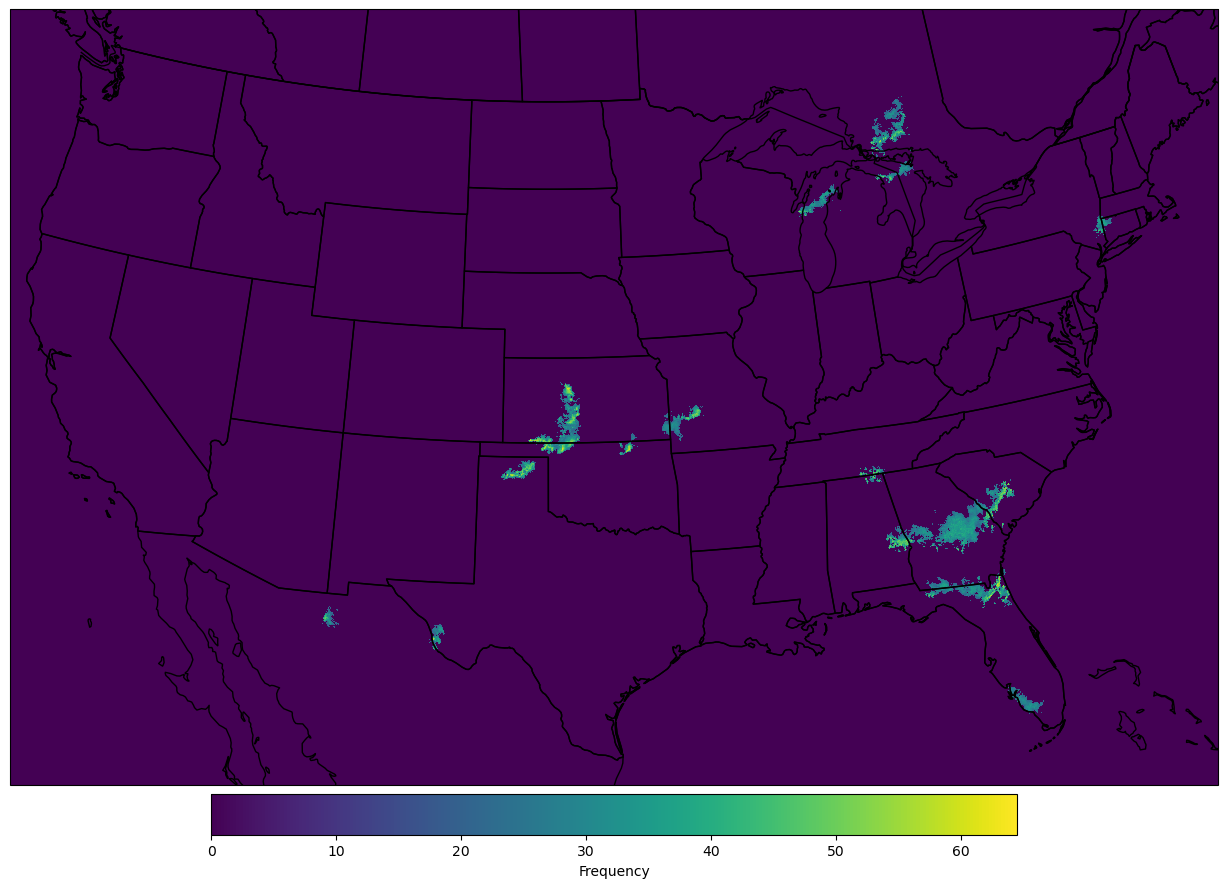

In [7]:
import matplotlib.pyplot as plt
import cartopy


fig = plt.figure()
fig.set_size_inches(16,12)
ax1 = fig.add_subplot(111, projection = cartopy.crs.LambertConformal(central_latitude = 40., central_longitude = -100.))


ax1.add_feature(cartopy.feature.STATES.with_scale('50m'), facecolor='none', zorder = 9)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.COASTLINE)
ax1.add_feature(cartopy.feature.BORDERS)

ax1.set_extent([-120,-75,23,50])

cfset = plt.pcolormesh(lon, lat, rad, transform=cartopy.crs.PlateCarree(), shading='auto')

#plt.title('Frequency of QLCS Storm Mode', fontsize = 'xx-large')
plt.colorbar(cfset, shrink=0.65, label='Frequency', location = 'bottom', pad= 0.01)

In [53]:
copy2 = xr.open_dataset(f'{date}/mrms_lcref{date[-12::]}.nc4')
copy2

<xarray.Dataset>
Dimensions:     (lon: 7000, lat: 3500)
Coordinates:
  * lon         (lon) float32 -130.0 -130.0 -130.0 ... -60.03 -60.02 -60.01
  * lat         (lat) float32 20.0 20.01 20.02 20.03 ... 54.96 54.97 54.98 54.99
Data variables:
    mrms_lcref  (lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.6

In [54]:
copy2.mrms_lcref.attrs

{'units': 'dBZ', 'long_name': 'reflectivity'}

In [57]:
lat = copy2.lat.values
lon = copy2.lon.values
rad = copy2.mrms_lcref.values

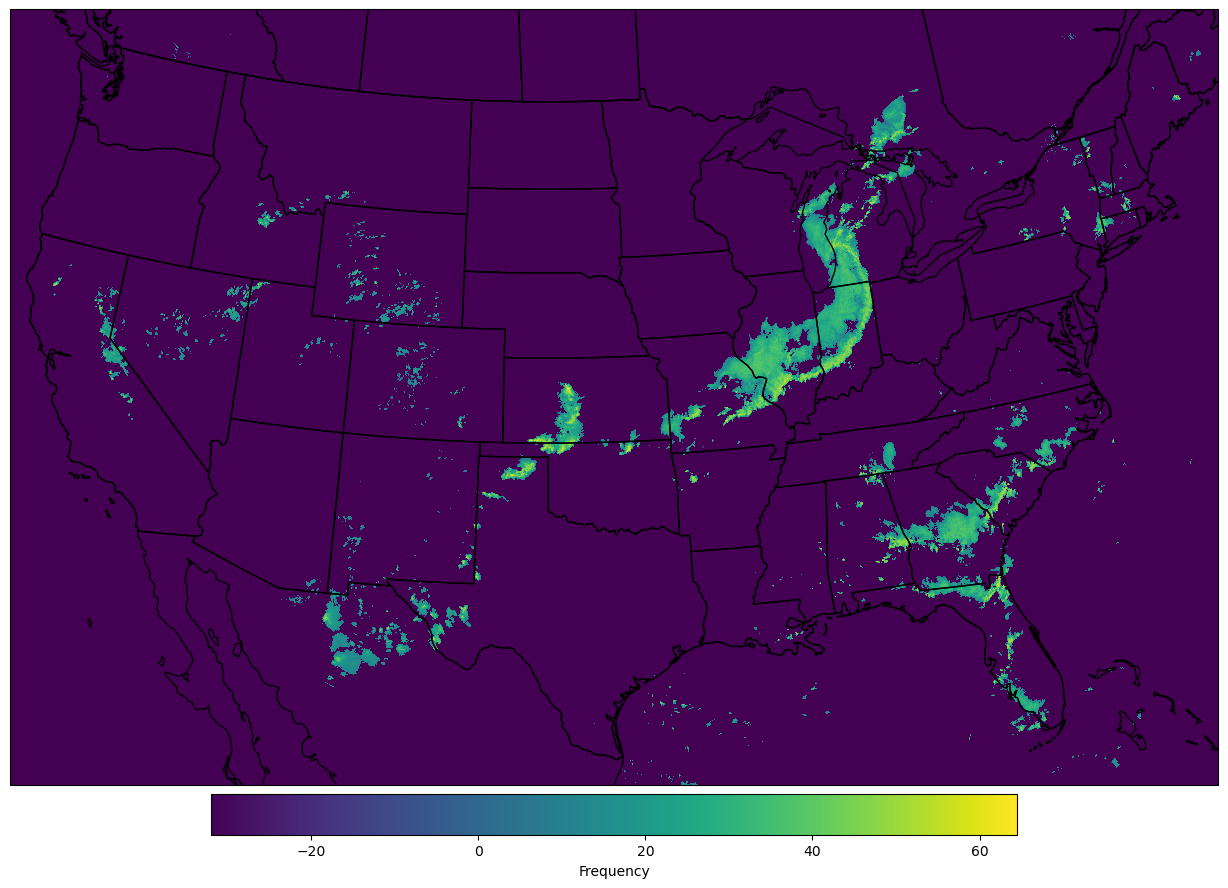

In [58]:
import matplotlib.pyplot as plt
import cartopy


fig = plt.figure()
fig.set_size_inches(16,12)
ax1 = fig.add_subplot(111, projection = cartopy.crs.LambertConformal(central_latitude = 40., central_longitude = -100.))


ax1.add_feature(cartopy.feature.STATES.with_scale('50m'), facecolor='none', zorder = 9)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.COASTLINE)
ax1.add_feature(cartopy.feature.BORDERS)

ax1.set_extent([-120,-75,23,50])

cfset = plt.pcolormesh(lon, lat, rad, transform=cartopy.crs.PlateCarree(), shading='auto')

#plt.title('Frequency of QLCS Storm Mode', fontsize = 'xx-large')
plt.colorbar(cfset, shrink=0.65, label='Frequency', location = 'bottom', pad= 0.01)

In [67]:
working_df = result[(result['start_time']==f'2020-06-03')]
working_df = working_df[(working_df['multiple_isolated_cells'] > 0.5)]

blanks = np.zeros((ds.mrms_lcref.shape))

ds = ds.where(ds['mrms_lcref'] >= 20, 0)


for rid, row in working_df.iterrows():
    blanks[row['ymin']:row['ymax']+1, row['xmin']:row['xmax']+1] = 1
    
cpy = ds.copy(deep=False, data={'mrms_lcref': ds['mrms_lcref'].values * blanks})

#new = cpy.assign(mrms_lcref=(('lat', 'lon'), ds['mrms_lcref'].values * blanks), attributes = {'units': 'dBZ', 'long_name': 'reflectivity'})
#new2 = new['mrms_lcref'].assign_attrs({'units': 'dBZ', 'long_name': 'reflectivity'})

cpy
#new.to_netcdf(f'test_copy.nc4')

<xarray.Dataset>
Dimensions:     (lat: 3500, lon: 7000)
Coordinates:
  * lon         (lon) float32 -130.0 -130.0 -130.0 ... -60.03 -60.02 -60.01
  * lat         (lat) float32 20.0 20.01 20.02 20.03 ... 54.96 54.97 54.98 54.99
Data variables:
    mrms_lcref  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    Conventions:  CF-1.6